In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.cluster import KMeans
import seaborn

In [2]:
data = pd.read_csv("C:\\Users\\User\\Desktop\\creditcard.csv")
print(data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

In [9]:
x_cols = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
y_cols = ['Class']
x = data[x_cols]
y = data[y_cols]
print("x\n")
print(x.head(5))
print("y\n")
print(y.head(5))

x

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9    ...          V19       V20       V21       V22  \
0  0.098698  0.363787    ...     0.403993  0.251412 -0.018307  0.277838   
1  0.085102 -0.255425    ...    -0.145783 -0.069083 -0.225775 -0.638672   
2  0.247676 -1.514654    ...    -2.261857  0.524980  0.247998  0.771679   
3  0.377436 -1.387024    ...    -1.232622 -0.208038 -0.108300  0.005274   
4 -0.270533  0.817739    ...     0.803487  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V

In [10]:
data.corr()['Class']


Time     -0.012322
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326482
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

MSE 0.0007433694121806431


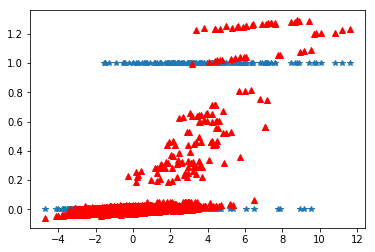

In [5]:
model=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
model.fit(x_train,y_train) 
y_p=model.predict(x_test) 
print("MSE",mean_squared_error(y_test,y_p))
plt.plot(x_test['V11'],y_test,"*",x_test['V11'],y_p,"r^")
plt.show()

0        -0.551600
1         1.612727
2         0.624501
3        -0.226487
4        -0.822843
5         1.341262
6        -1.416907
7        -0.619468
8        -0.705117
9         1.017614
10        1.199644
11       -0.259116
12        0.227666
13       -0.773657
14        0.844555
15       -0.793981
16       -0.450311
17        0.324098
18        0.917230
19        1.077542
20        1.019151
21        1.690330
22        0.744786
23       -0.583200
24       -0.081257
25       -0.856566
26       -0.143419
27       -0.641506
28       -0.012142
29        1.048292
            ...   
284776    1.218465
284777   -0.822911
284778    0.874312
284779   -0.590756
284780   -1.296770
284781    0.659941
284782    1.045386
284783   -0.344690
284784    0.187488
284785   -0.199626
284786   -0.451656
284787   -1.089397
284788   -0.635200
284789   -1.291228
284790    0.362990
284791   -1.187546
284792   -1.381624
284793   -0.222959
284794   -1.311976
284795   -1.052365
284796   -1.134176
284797   -0.

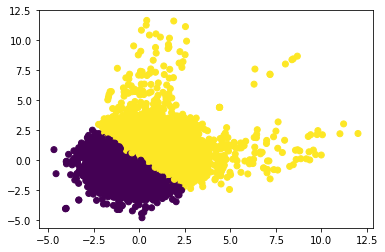

In [6]:
data1=data['V11']
print(data1)
data1=np.asarray(data1).reshape(142403,2)
print(data1)
kmeans=KMeans(n_clusters=2)
kmeans.fit(data1)
print(kmeans.labels_)
plt.scatter(data1[:,0],data1[:,1],c=kmeans.labels_)
print("MSE",mean_squared_error(data1[:,0],kmeans.labels_))
plt.show()

[1 1 1 ... 0 0 0]
MSE 0.5371902277339663


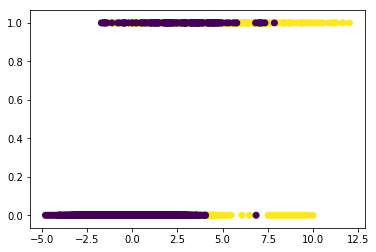

In [51]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(x)
print(kmeans.labels_)
plt.scatter(x["V11"],y,c=kmeans.labels_)
print("MSE",mean_squared_error(y,kmeans.labels_))
plt.show()